# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
data = pd.read_csv("assignment3_creditcard.csv")

In [4]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [8]:
#Data 결측치 확인
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28678 entries, 0 to 28677
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      28678 non-null  float64
 1   V2      28678 non-null  float64
 2   V3      28678 non-null  float64
 3   V4      28678 non-null  float64
 4   V5      28678 non-null  float64
 5   V6      28678 non-null  float64
 6   V7      28678 non-null  float64
 7   V8      28678 non-null  float64
 8   V9      28678 non-null  float64
 9   V10     28678 non-null  float64
 10  V11     28678 non-null  float64
 11  V12     28678 non-null  float64
 12  V13     28678 non-null  float64
 13  V14     28678 non-null  float64
 14  V15     28678 non-null  float64
 15  V16     28678 non-null  float64
 16  V17     28678 non-null  float64
 17  V18     28678 non-null  float64
 18  V19     28678 non-null  float64
 19  V20     28678 non-null  float64
 20  V21     28678 non-null  float64
 21  V22     28678 non-null  float64
 22

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
Class    0
dtype: int64

In [20]:
target = data["Class"]
features = data.drop("Class",axis =1)
data.describe()
#분포가 일정하지 않아 scaling이 필요하다.

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,...,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535,0.008578
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,...,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736,0.092221
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,...,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915,0.000000
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,...,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189,0.000000
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,...,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075,0.000000
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,...,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911,0.000000
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,...,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133,1.000000


feature 간 scale 차이가 존재하며 평균과 최소,최대값을 비교하여 이상치가 많이 존재한다고 생각한다. 따라서 데이터를 정규화하여 상대적 크기에 대한 영향력을 줄인 다음 분석을 진행할 예정이다.

참조 :
(정규화와 표준화)       
https://heeya-stupidbutstudying.tistory.com/entry/%ED%86%B5%EA%B3%84-%EC%A0%95%EA%B7%9C%ED%99%94%EC%99%80-%ED%91%9C%EC%A4%80%ED%99%94

(sklearn preprocessing StandardScaler MinMaxScaler) https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=demian7607&logNo=222009975984
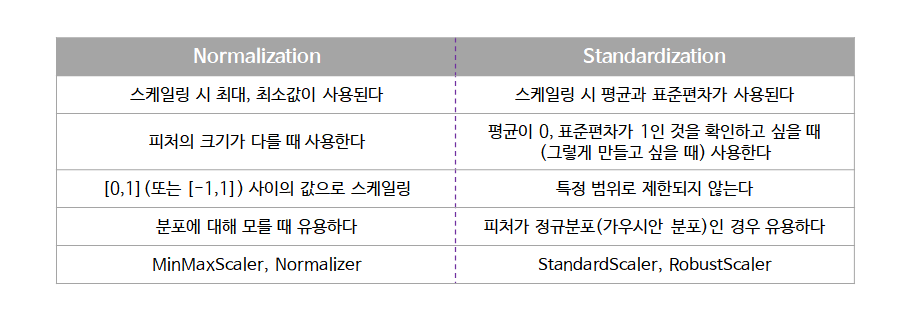

<AxesSubplot:xlabel='Class', ylabel='count'>

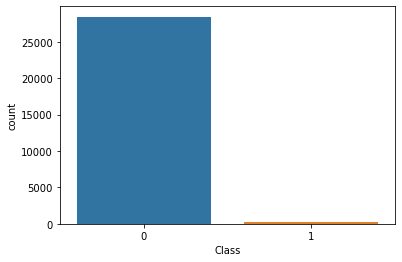

In [21]:
sns.countplot(target)

불균형한 Dataset으로 신뢰할 수 없는 정확도가 나올 것으로 예상된다. 따라서 정밀도와 재현율 등의 지표 개선을 노력할 예정이다.

TN : 실제 값과 모델예측값 모두 0인 경우

TP : 실제 값과 모델예측값 모두 1인 경우 

FP : 실제 값은 0이지만 모델예측값이 1인 경우

FN : 실제 값은 1이지만 모델예측값이 0인 경우



- Accuracy = $ \frac{TP + TN}{TP + FN + FP + TN}$
- Precision = $ \frac{TP}{TP + FP}$
- Recall = $ \frac{TP}{TP + FN}$
- F1_Score = $ 2 * \frac{Precision * Recall}{Precision + Recall}$ (Recall 과 Precision의 조화평균)
- FPR(1 - specificity) = $ \frac{FP}{FP + TN} $
- Specificity = $ \frac{TN}{FP + TN} $

참조 : 
(지표) https://sumniya.tistory.com/26

(이미지 출처)
https://www.google.com/url?sa=i&url=https%3A%2F%2Ftowardsdatascience.com%2Fconfusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826&psig=AOvVaw36VLENpTYB7pqQbCFFz8Mq&ust=1675226398253000&source=images&cd=vfe&ved=0CBAQjRxqFwoTCJDb1eb-8PwCFQAAAAAdAAAAABAD

## 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = 11, stratify = target)

# stratify = target 으로 지정해주어 train 과 test 가 동일한 class 값을 갖을 수 있다.

## feature의 정규화

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns= features.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns= features.columns)
X_train.describe()

In [ ]:
X_test.describe()

## Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

pred_proba = model.predict_proba(X_test)[:, -1].reshape(-1,1)
f1_score(y_pred, y_test)

In [ ]:
print(classification_report(y_pred,y_test))

## Confusion Matrix

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

p = fn + tp
n = tn + fp

accuracy = (tp + tn) / (p + n)      # 전체 데이터 중 맞게 분류된 데이터 비율
errorRate = (fn + fp) / (p + n)     # 전체 데이터 중 잘못 분류된 데이터 비율
recall_sensitivity = tp / p          # 1인 데이터를 1로 분류한 비율
precision = tp / (tp + fp)          # 1로 분류한 데이터 중 실제 1인 비율
specificity = tn / (tn + fp)        # 0으로 분류한 데이터 중 실제 0인 비율
Fpr = fp / n                        # 0으로 분류한 데이터 중 실제 1인 비율
f1 = f1_score(y_pred, y_test)       # Recall 과 Precision의 조화 평균

print("           Accuracy:", accuracy)
print("         Error Rate:", errorRate)
print("             Recall:", recall_sensitivity)
print("          Precision:", precision)
print("        Specificity:", specificity)
print("False Positive Rate:", Fpr)
print("                 f1:", f1)

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'o-', label="Logistic Regression") 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1-specificity], [recall_sensitivity], 'ro', ms=10) # 현재 cutoff value 값 
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

AUC 는 곡선 ROC 곡선 아래의 너비로, AUC Score의 경우 1에 가까울수록 성능이 좋다

In [ ]:
from sklearn.metrics import auc
print("AUC:", auc(fpr,tpr))

## 성능 개선

정밀도와 재현율을 trade-off 관계를 갖는데, 임계치를 높이면 정밀도가 상승하고 임계치를 낮추면 재현율은 증가한다. 현재 모델의 목표인 사기인 카드를 사기로 적발해야 하는 상황에서 사기인 카드를 사기가 아니라고 판다하게 될 경우 큰 문제가 되기 때문에 재현율을 주요한 지표로 사용할 수 있다. 하지만 재현율을 1로 만들게 되면 사기가 아닌 카드를 사기로 예측하여 정밀도가 매우 작아진다. 따라서 두 지표를 모두 충족시키는 방안으로 아래 식을 이용하여 임계치를 설정하여야 한다.


Optimal cut-off value는 $ {sensitivity}-{(1-specificity)}=k$ 식에서 k가 가장 클 때이다.

In [ ]:
design_idx = np.argmax(tpr-fpr)
optimal_cut = thresholds[design_idx]

optimal_pred = model.decision_function(X_test) > optimal_cut

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, optimal_pred).ravel()

p = fn + tp
n = tn + fp

accuracy = (tp + tn) / (p + n)      # 전체 데이터 중 맞게 분류된 데이터 비율
errorRate = (fn + fp) / (p + n)     # 전체 데이터 중 잘못 분류된 데이터 비율
recall_sensitivity = tp / p          # 1인 데이터를 1로 분류한 비율
precision = tp / (tp + fp)          # 1로 분류한 데이터 중 실제 1인 비율
specificity = tn / (tn + fp)        # 0으로 분류한 데이터 중 실제 0인 비율
Fpr = fp / n                        # 0으로 분류한 데이터 중 실제 1인 비율
f1 = f1_score(y_pred, y_test)       # Recall 과 Precision의 조화 평균

print("           Accuracy:", accuracy)
print("         Error Rate:", errorRate)
print("             Recall:", recall_sensitivity)
print("          Precision:", precision)
print("        Specificity:", specificity)
print("False Positive Rate:", Fpr)
print("                 f1:", f1)

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'o-', label="Logistic Regression") 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1-specificity], [recall_sensitivity], 'ro', ms=10) # 현재 cutoff value 값 
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

In [ ]:
from sklearn.metrics import auc
print("AUC:", auc(fpr,tpr))

AUC 는 곡선 ROC 곡선 아래의 너비로, AUC Score의 경우 1에 가까울수록 성능이 좋다

In [ ]:
from sklearn.metrics import auc
print("AUC:", auc(fpr,tpr))

## 성능 개선

정밀도와 재현율을 trade-off 관계를 갖는데, 임계치를 높이면 정밀도가 상승하고 임계치를 낮추면 재현율은 증가한다. 현재 모델의 목표인 사기인 카드를 사기로 적발해야 하는 상황에서 사기인 카드를 사기가 아니라고 판다하게 될 경우 큰 문제가 되기 때문에 재현율을 주요한 지표로 사용할 수 있다. 하지만 재현율을 1로 만들게 되면 사기가 아닌 카드를 사기로 예측하여 정밀도가 매우 작아진다. 따라서 두 지표를 모두 충족시키는 방안으로 아래 식을 이용하여 임계치를 설정하여야 한다.


Optimal cut-off value는 $ {sensitivity}-{(1-specificity)}=k$ 식에서 k가 가장 클 때이다.

In [ ]:
design_idx = np.argmax(tpr-fpr)
optimal_cut = thresholds[design_idx]

optimal_pred = model.decision_function(X_test) > optimal_cut

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, optimal_pred).ravel()

p = fn + tp
n = tn + fp

accuracy = (tp + tn) / (p + n)      # 전체 데이터 중 맞게 분류된 데이터 비율
errorRate = (fn + fp) / (p + n)     # 전체 데이터 중 잘못 분류된 데이터 비율
recall_sensitivity = tp / p          # 1인 데이터를 1로 분류한 비율
precision = tp / (tp + fp)          # 1로 분류한 데이터 중 실제 1인 비율
specificity = tn / (tn + fp)        # 0으로 분류한 데이터 중 실제 0인 비율
Fpr = fp / n                        # 0으로 분류한 데이터 중 실제 1인 비율
f1 = f1_score(y_pred, y_test)       # Recall 과 Precision의 조화 평균

print("           Accuracy:", accuracy)
print("         Error Rate:", errorRate)
print("             Recall:", recall_sensitivity)
print("          Precision:", precision)
print("        Specificity:", specificity)
print("False Positive Rate:", Fpr)
print("                 f1:", f1)

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'o-', label="Logistic Regression") 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1-specificity], [recall_sensitivity], 'ro', ms=10) # 현재 cutoff value 값 
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

In [ ]:
from sklearn.metrics import auc
print("AUC:", auc(fpr,tpr))

AUC 는 곡선 ROC 곡선 아래의 너비로, AUC Score의 경우 1에 가까울수록 성능이 좋다

In [49]:
from sklearn.metrics import auc
print("AUC:", auc(fpr,tpr))

AUC: 0.9943300689363138


## 성능 개선

정밀도와 재현율을 trade-off 관계를 갖는데, 임계치를 높이면 정밀도가 상승하고 임계치를 낮추면 재현율은 증가한다. 현재 모델의 목표인 사기인 카드를 사기로 적발해야 하는 상황에서 사기인 카드를 사기가 아니라고 판다하게 될 경우 큰 문제가 되기 때문에 재현율을 주요한 지표로 사용할 수 있다. 하지만 재현율을 1로 만들게 되면 사기가 아닌 카드를 사기로 예측하여 정밀도가 매우 작아진다. 따라서 두 지표를 모두 충족시키는 방안으로 아래 식을 이용하여 임계치를 설정하여야 한다.


Optimal cut-off value는 $ {sensitivity}-{(1-specificity)}=k$ 식에서 k가 가장 클 때이다.

In [52]:
design_idx = np.argmax(tpr-fpr)
optimal_cut = thresholds[design_idx]

optimal_pred = model.decision_function(X_test) > optimal_cut

In [53]:
tn, fp, fn, tp = confusion_matrix(y_test, optimal_pred).ravel()

p = fn + tp
n = tn + fp

accuracy = (tp + tn) / (p + n)      # 전체 데이터 중 맞게 분류된 데이터 비율
errorRate = (fn + fp) / (p + n)     # 전체 데이터 중 잘못 분류된 데이터 비율
recall_sensitivity = tp / p          # 1인 데이터를 1로 분류한 비율
precision = tp / (tp + fp)          # 1로 분류한 데이터 중 실제 1인 비율
specificity = tn / (tn + fp)        # 0으로 분류한 데이터 중 실제 0인 비율
Fpr = fp / n                        # 0으로 분류한 데이터 중 실제 1인 비율
f1 = f1_score(y_pred, y_test)       # Recall 과 Precision의 조화 평균

print("           Accuracy:", accuracy)
print("         Error Rate:", errorRate)
print("             Recall:", recall_sensitivity)
print("          Precision:", precision)
print("        Specificity:", specificity)
print("False Positive Rate:", Fpr)
print("                 f1:", f1)

           Accuracy: 0.9942468619246861
         Error Rate: 0.005753138075313808
             Recall: 0.9387755102040817
          Precision: 0.6052631578947368
        Specificity: 0.9947248109723932
False Positive Rate: 0.005275189027606823
                 f1: 0.7407407407407408


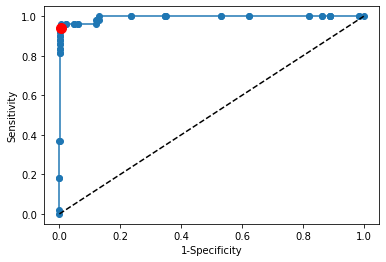

In [54]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'o-', label="Logistic Regression") 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1-specificity], [recall_sensitivity], 'ro', ms=10) # 현재 cutoff value 값 
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

In [55]:
from sklearn.metrics import auc
print("AUC:", auc(fpr,tpr))

AUC: 0.9943300689363138
